# 🎓 Домашнее задание: "Основы Pandas"


Вы — аналитик в магазине цифровой дистрибуции игр. Ваш босс хочет запустить новую маркетинговую акцию **"Скрытые алмазы"**.
Ваша задача — найти в данных игры, которые незаслуженно обделены вниманием, или являются абсолютными лидерами в своих нишах.

Для выполнения задания вам понадобится тот же датасет, что и на лекции.


In [ ]:
!pip install pandas -q
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("lunthu/gog-com-video-games-dataset")
df = pd.read_csv(path + '/gog_games_dataset.csv')


### **Задание 1: Разведка ниш**
Игры редко принадлежат к одному чистому жанру. Обычно это смесь (например, `'RPG, Action'`).
Маркетологи хотят знать, какие именно **комбинации жанров** встречаются в магазине чаще всего.

Выведите топ-10 сочетаний жанров из набора данных.


In [ ]:
# Ваш код здесь
genres = df['genres']

genres_mix_top = genres.value_counts(normalize=True).head(10)
genres_mix_percentages = genres_mix_top.apply(lambda x: round(x * 100, 1))
genres_mix_percentages.name = "percent"
genres_mix_percentages

,percent
genres,
"['Action', 'Adventure', 'Platformer']",2.6
"['Strategy', 'Real-time', 'Historical']",2.2
"['Role-playing', 'Turn-based', 'Fantasy']",1.9
"['Role-playing', 'Adventure', 'Fantasy']",1.9
"['Action', 'Adventure', 'Fantasy']",1.7
"['Adventure', 'Point-and-click', 'Puzzle']",1.7
"['Strategy', 'Turn-based', 'Sci-fi']",1.6
"['Adventure', 'Visual Novel', 'Narrative']",1.5
"['Strategy', 'Real-time', 'Sci-fi']",1.4


<Axes: title={'center': 'Top genre combinations'}, xlabel='genres'>

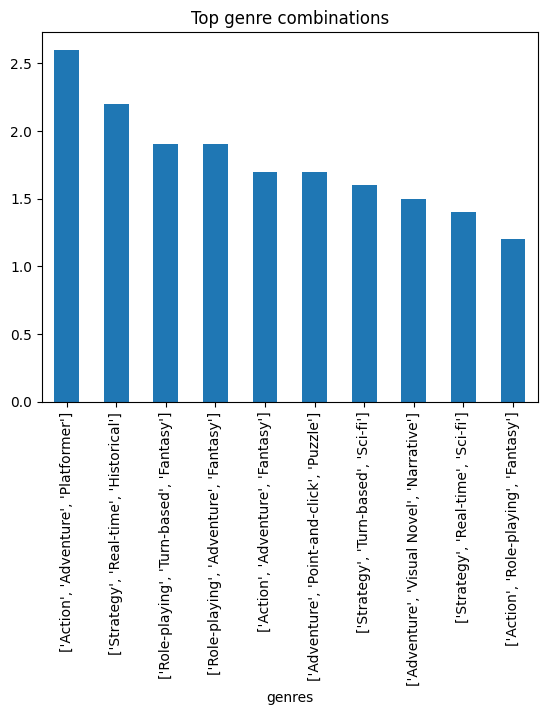

In [ ]:
genres_mix_percentages.plot(kind='bar', title='Top genre combinations')

### **Задание 2: Ценовые сегменты**
Руководство хочет понять, много ли у нас "премиальных" игр.
Отфильтруйте и покажите игры, которые стоят **дороже 50 евро**.
Сколько таких игр нашлось?

In [ ]:
# Ваш код здесь
mask = df["amount"] > 50
expensive_games = df.loc[mask]
sorted_games = expensive_games.sort_values(by="amount")

games_list_lenght = len(expensive_games)
text_lenght = len(f"Количество игр дороже 50 евро: {games_list_lenght} шт")
print(f"Количество игр дороже 50 евро: {games_list_lenght} шт")
print("-" * text_lenght)
sorted_games[["title", "amount"]]

Количество игр дороже 50 евро: 304 шт
-------------------------------------


,title,amount
45,Kingdom Come: Deliverance II,50.99
7777,WARNO - Gold Edition,52.49
7899,Frostpunk 2 - Deluxe Edition,52.49
5011,Tainted Grail: The Fall of Avalon - Supporter ...,53.59
6954,Tactical Warfare Bundle,54.39
...,...,...
2812,Yuzusoft Collection,118.75
9682,The Legend of Heroes: Trails through Daybreak ...,130.09
2450,The Legend of Heroes: Trails through Daybreak ...,134.39
8186,The Legend of Heroes: Trails through Daybreak ...,185.99


### **Задание 3: "Подарочный сертификат"**
У клиента есть подарочный сертификат ровно на **15 евро**. Он хочет купить одну крутую игру и потратить сертификат максимально эффективно (чтобы не осталось мелкой сдачи).

Найдите игры, которые попадают в **узкий ценовой коридор**:
1.  Цена (`amount`) **от 12 до 15 евро** (включительно).
2.  Рейтинг (`rating`) строго **выше 40**.

Выведите название, цену и рейтинг. Отсортируйте результат по рейтингу (лучшие — сверху).

In [ ]:
# Ваш код здесь
min_price = 12
max_price = 15

price_mask = df["amount"].between(min_price, max_price)
rating_mask = df['rating'] > 40
price_rating_selected = df[price_mask & rating_mask]
result = price_rating_selected.sort_values(by=["rating", "amount"], ascending=[False, False])

print(f"Количество подобранных игр:  {len(result)} шт")
result[["title", "amount", "rating"]]

Количество подобранных игр:  73 шт


,title,amount,rating
2245,Star of Providence,14.79,49
4700,Stardew Valley,13.69,48
1075,Desperados III Digital Deluxe Edition,12.56,48
2944,Hollow Knight,14.79,47
5443,Dishonored: Complete Collection,14.01,47
...,...,...,...
4241,D4: Dark Dreams Don't Die - Season One,13.69,41
4793,Stories: The Path of Destinies,13.69,41
6563,COLLAPSED,12.99,41
3685,Littlewood,12.49,41


### **Задание 4: Работа с конкурентами**
Мы хотим посмотреть, как обстоят дела у конкретного разработчика. Пусть это будет **'Bethesda Softworks'**.
Создайте маску (фильтр), чтобы найти все игры этого разработчика.
Отсортируйте их по рейтингу (от лучшего к худшему).

In [ ]:
# Ваш код здесь
dev_games = 'Bethesda Softworks'
bs_mask = df['developer'] == dev_games
dev_selection = df[bs_mask]
dev_sort = dev_selection.sort_values(by='rating', ascending=False)

print(f'Найдено {len(dev_sort)} игр(ы) производителя {dev_games}')
dev_sort[['developer', 'rating', 'amount']]

Найдено 5 игр(ы) производителя Bethesda Softworks


,developer,rating,amount
4404,Bethesda Softworks,48,5.99
4402,Bethesda Softworks,36,2.39
4401,Bethesda Softworks,35,2.39
4302,Bethesda Softworks,0,0.00
4303,Bethesda Softworks,0,0.00


### **Задание 5: Математика скидок**
Босс одобрил скидку **20%** на ВСЕ игры в датасете.
1. Создайте новую колонку `discount_price`.
2. В ней должна быть цена (`amount`), умноженная на 0.8.
3. Выведите таблицу с колонками `title`, `amount`, `discount_price` и убедитесь, что цена снизилась.


In [ ]:
# Ваш код здесь
discount_ratio = 0.8

df['discount_price'] = pd.Series(df['amount'] * discount_ratio)
price_сhange = df.loc[0, 'amount'] - df.loc[0, 'discount_price']

print(f'РЕЗУЛЬТАТ ПРОВЕРКИ: ЦЕНА{"" if price_сhange else " НЕ"} ИЗМЕНИЛАСЬ')
df[['title', 'amount', 'discount_price']]


РЕЗУЛЬТАТ ПРОВЕРКИ: ЦЕНА ИЗМЕНИЛАСЬ


,title,amount,discount_price
0,Descent: Freespace Battle Pack,9.99,7.992
1,Freespace 2,9.99,7.992
2,MDK,7.99,6.392
3,Messiah,11.99,9.592
4,Lionheart: Legacy of the Crusader,7.99,6.392
...,...,...,...
10891,Age of Wonders: Planetfall - Premium Edition,16.29,13.032
10892,Knights of the Chalice Demo,0.00,0.000
10893,Combat Mission Cold War,30.49,24.392
10894,Sudden Strike 4,5.99,4.792


### **Задание 6: Самая переоцененная игра**
Найдите игру, у которой самое плохое соотношение цены и качества.
1. Создайте метрику "Жадность" (`greed_score`): Цена деленная на Рейтинг (`amount` / `rating`). Чем выше цена и ниже рейтинг, тем выше "жадность".
2. Отсортируйте таблицу по этому показателю по убыванию.
3. Выведите топ-3 игры с самым высоким показателем "жадности".


In [ ]:
# Ваш код здесь
price_f = df.loc[df['amount'] > 0]
price_rating_f = price_f.loc[price_f['rating'] > 0].copy()
price_rating_f['greed_score'] = price_rating_f['amount'] / price_rating_f['rating']
sorted_f = price_rating_f.sort_values(by='greed_score', ascending=False)
sorted_f[['title', 'amount', 'rating', 'greed_score']].head(3)

,title,amount,rating,greed_score
10425,Talisman: Digital Classic Edition - DLC Bundle,27.52,10,2.7520
5269,Mount & Blade II: Bannerlord - War Sails,91.19,44,2.0725
4581,No Man's Sky,54.99,30,1.8330


#### **Задание 7: Аналитический отчет для инвестора**
Инвестор просит составить "Топ-3 перспективных жанра" для вложения денег.
Критерии "перспективности" он не дал, придумайте сами.

*Задача:* Выберите метрику, отфильтруйте "мусор" и выдайте 3 жанра.

In [12]:
# Ваш код здесь
import ast

mask_rating = df['overallAvgRating'] > 3.9
mask_review = df['reviewCount'] > 80
mask_amount = df['amount'] > 0
df_rated = df[mask_rating & mask_review & mask_amount]
df_res = df_rated['genres']

genres_dict = {}
for _, genre in df_res.items():
  genres_list = ast.literal_eval(genre)
  for genre in genres_list:
    genres_dict[genre] = genres_dict.get(genre, 0) + 1

res_sorted = sorted(genres_dict.items(), key=lambda g: g[1], reverse=True)
g1, g2, g3 = tuple([genre[0] for genre in res_sorted][:3])
print(f'ТОП-3 САМЫХ ПЕРСПЕКТИВНЫХ ЖАНРОВ ИГР: {g1}, {g2}, {g3}')


ТОП-3 САМЫХ ПЕРСПЕКТИВНЫХ ЖАНРОВ ИГР: Action, Adventure, Role-playing
